<a href="https://colab.research.google.com/github/saidoyk/MyTesting/blob/main/Mining_proje_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.svm import SVC
data_df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data_df.duplicated().any()

False

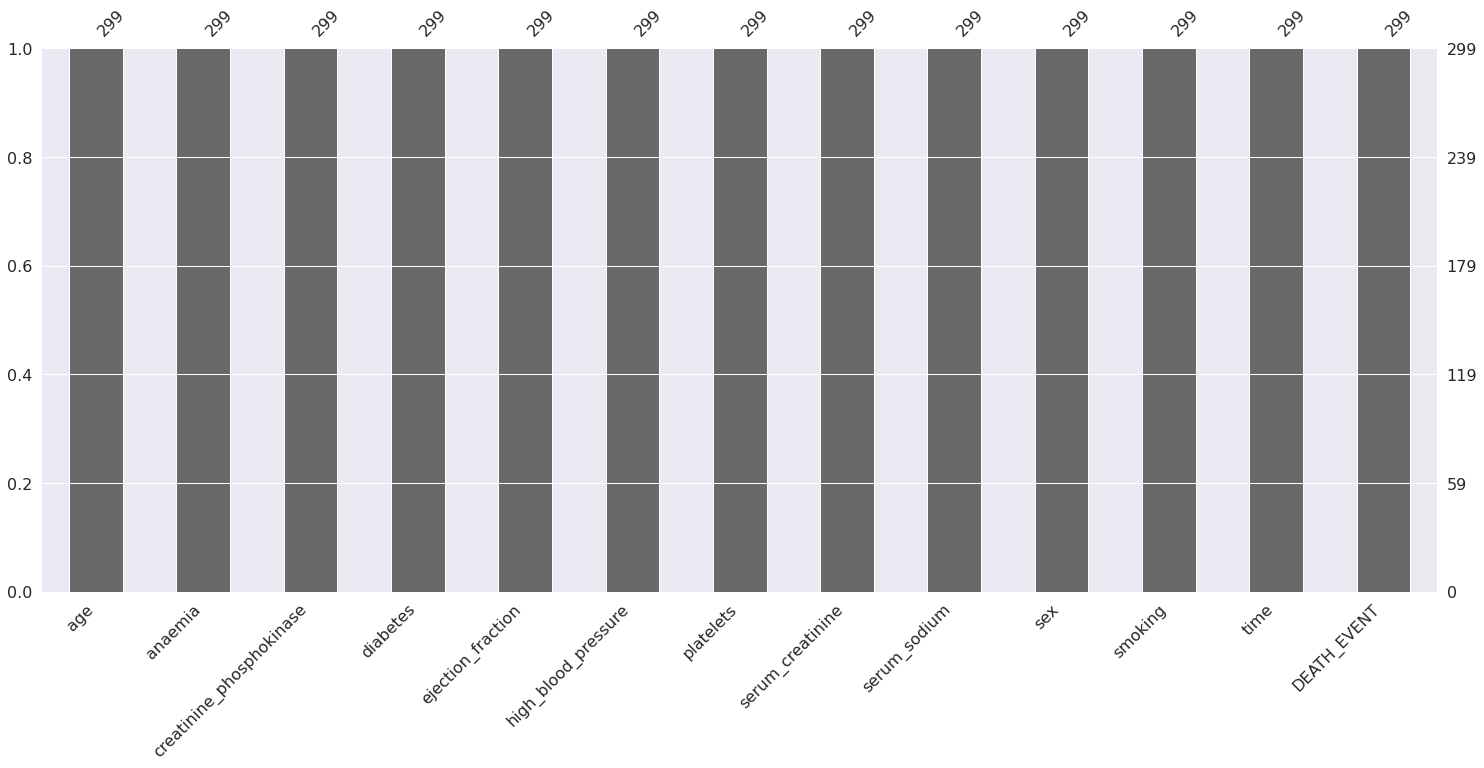

In [ ]:
import missingno as mso
mso.bar(data_df)

In [ ]:
#import seaborn as sns
#sns.pairplot(dataset_df)

In [ ]:
data_df = data_df.drop(data_df[(data_df.DEATH_EVENT == 0)].index)
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
230,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
246,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1
262,65.0,1,258,1,25,0,198000.00,1.40,129,1,0,235,1


In [ ]:
data_df['time'].describe()

count     96.000000
mean      70.885417
std       62.378281
min        4.000000
25%       25.500000
50%       44.500000
75%      102.250000
max      241.000000
Name: time, dtype: float64

In [ ]:
data_df['time'][data_df['time']<=71]=0
data_df['time'][(data_df['time']>71) & (data_df['time']<=242)]=1
data_df['time'][(data_df['time']>85) & (data_df['time']<=242)]=2

data_df['creatinine_phosphokinase']=(data_df['creatinine_phosphokinase']-data_df['creatinine_phosphokinase'].min())/(data_df['creatinine_phosphokinase'].max()-data_df['creatinine_phosphokinase'].min())
data_df['age']=(data_df['age']-data_df['age'].min())/(data_df['age'].max()-data_df['age'].min())
data_df['ejection_fraction']=(data_df['ejection_fraction']-data_df['ejection_fraction'].min())/(data_df['ejection_fraction'].max()-data_df['ejection_fraction'].min())
data_df['platelets']=(data_df['platelets']-data_df['platelets'].min())/(data_df['platelets'].max()-data_df['platelets'].min())
data_df['serum_creatinine']=(data_df['serum_creatinine']-data_df['serum_creatinine'].min())/(data_df['serum_creatinine'].max()-data_df['serum_creatinine'].min())
data_df['serum_sodium']=(data_df['serum_sodium']-data_df['serum_sodium'].min())/(data_df['serum_sodium'].max()-data_df['serum_sodium'].min())

data_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.622642,0,0.071319,0,0.107143,1,0.379791,0.147727,0.466667,1,0,0,1
1,0.245283,0,1.000000,0,0.428571,0,0.376930,0.056818,0.666667,1,0,0,1
2,0.433962,0,0.015693,0,0.107143,0,0.200348,0.079545,0.433333,1,1,0,1
3,0.150943,1,0.011227,0,0.107143,0,0.283972,0.147727,0.700000,1,0,0,1
4,0.433962,1,0.017479,1,0.107143,0,0.487805,0.238636,0.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.584906,0,0.071319,0,0.107143,0,0.376930,0.139773,0.600000,1,0,1,1
230,0.339623,0,0.018244,0,0.285714,0,0.026132,0.125000,0.366667,0,0,1,1
246,0.245283,0,0.254402,0,0.196429,0,0.465157,0.056818,0.733333,1,0,1,1
262,0.433962,1,0.029982,1,0.196429,0,0.263066,0.090909,0.433333,1,0,1,1


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


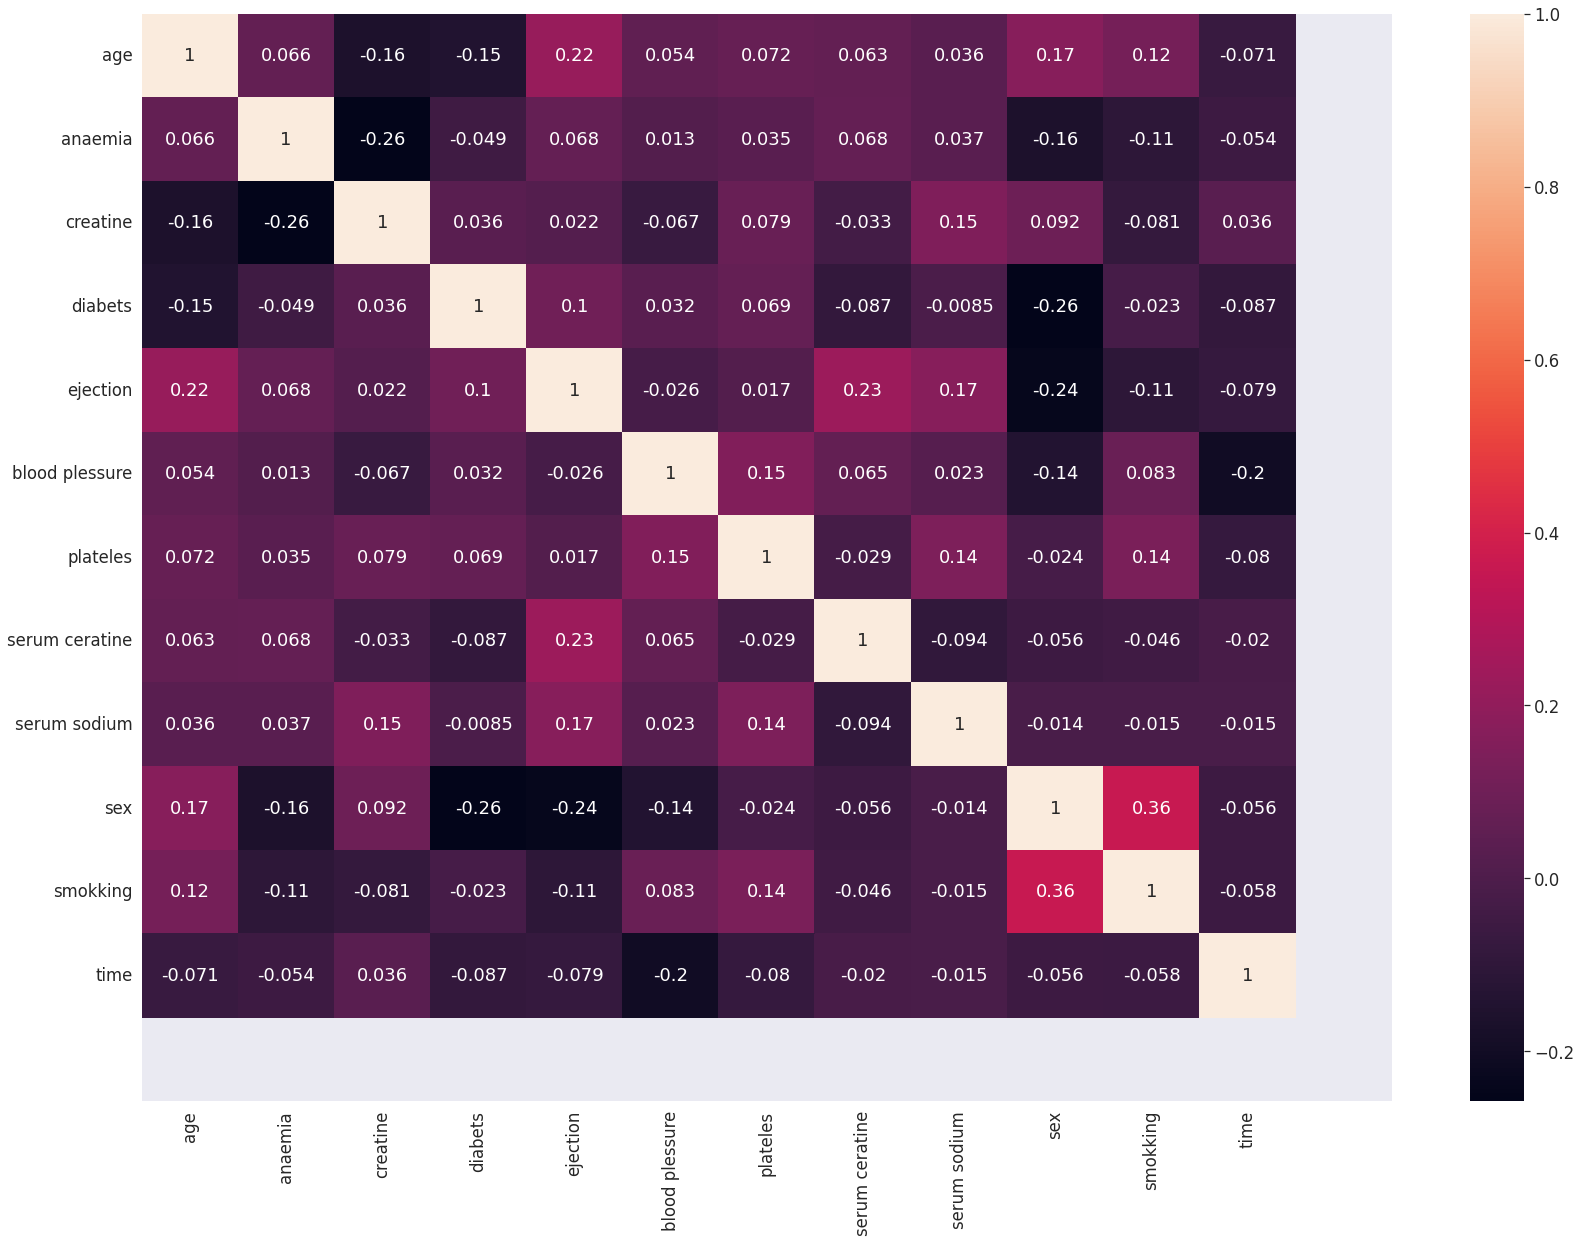

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
cm = np.corrcoef(data_df.values.T)
sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(28,20))
cols=['age', 'anaemia', 'creatine','diabets', 'ejection','blood plessure','plateles','serum ceratine','serum sodium','sex','smokking','time']
sns.heatmap(cm, annot=True, yticklabels=cols, xticklabels=cols)

In [ ]:
y.describe()

count    96.000000
mean      0.895833
std       0.851984
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: time, dtype: float64

In [ ]:
y=data_df.pop('time')
data_df.drop('DEATH_EVENT',axis=1,inplace=True)
X = data_df[['age', 'anaemia', 'ejection_fraction','high_blood_pressure']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.1)



{'whiskers': [<matplotlib.lines.Line2D object at 0x7fdf38cd3690>, <matplotlib.lines.Line2D object at 0x7fdf34fd0410>], 'caps': [<matplotlib.lines.Line2D object at 0x7fdf34fd0810>, <matplotlib.lines.Line2D object at 0x7fdf34fd0d90>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fdf394c5b10>], 'medians': [<matplotlib.lines.Line2D object at 0x7fdf37b9b790>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fdf3526acd0>], 'means': []}


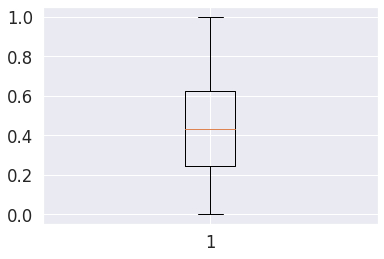

{'whiskers': [<matplotlib.lines.Line2D object at 0x7fdf342f6c90>, <matplotlib.lines.Line2D object at 0x7fdf342f6fd0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fdf342f6050>, <matplotlib.lines.Line2D object at 0x7fdf34208d50>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fdf3424a050>], 'medians': [<matplotlib.lines.Line2D object at 0x7fdf34208b90>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fdf3423f490>], 'means': []}


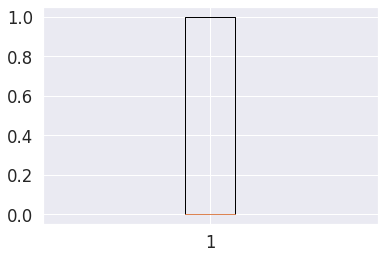

{'whiskers': [<matplotlib.lines.Line2D object at 0x7fdf3432d590>, <matplotlib.lines.Line2D object at 0x7fdf3432d110>], 'caps': [<matplotlib.lines.Line2D object at 0x7fdf342bbad0>, <matplotlib.lines.Line2D object at 0x7fdf342bbf90>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fdf3432da50>], 'medians': [<matplotlib.lines.Line2D object at 0x7fdf34300090>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fdf34300110>], 'means': []}


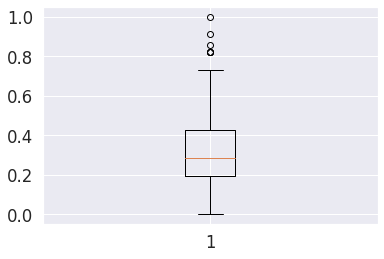

{'whiskers': [<matplotlib.lines.Line2D object at 0x7fdf345e7b10>, <matplotlib.lines.Line2D object at 0x7fdf343d8550>], 'caps': [<matplotlib.lines.Line2D object at 0x7fdf343d8750>, <matplotlib.lines.Line2D object at 0x7fdf343d8ed0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fdf34385790>], 'medians': [<matplotlib.lines.Line2D object at 0x7fdf343f3fd0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fdf343f3f90>], 'means': []}


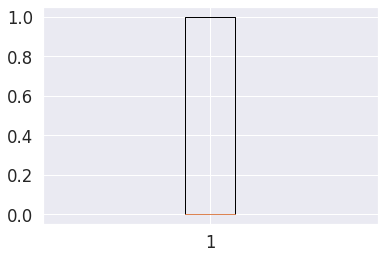

In [ ]:
print(plt.boxplot(data_df["age"]))
plt.show()
print(plt.boxplot(data_df["anaemia"]))
plt.show()
print(plt.boxplot(data_df["ejection_fraction"]))
plt.show()
print(plt.boxplot(data_df["high_blood_pressure"]))
plt.show()

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10

Train: 0.627906976744186
Test: 0.6


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

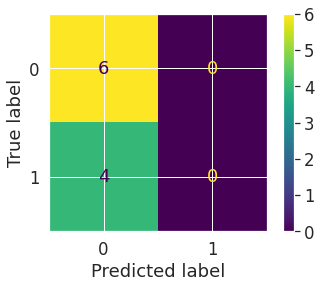

In [ ]:

from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_predict_train=clf.predict(X_train)
y_predict_test=clf.predict(X_test)


from sklearn.metrics import accuracy_score,f1_score,plot_confusion_matrix,classification_report
print(classification_report(y_test,y_predict_test))

plot_confusion_matrix(clf,X_test,y_test)

from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
print("Train:",accuracy_score(y_train,y_predict_train))
print("Test:",accuracy_score(y_test,y_predict_test))

In [ ]:
from sklearn.svm import SVC
clf=SVC(kernel='linear',C=1.0,class_weight='balanced')
clf.fit(X_train,y_predict_train)
y_predict_test=clf.predict(X_test)
y_predict_train=clf.predict(X_train)
print(classification_report(y_test,y_predict_test))

plot_confusion_matrix(clf,X_test,y_test)

print("Train:",accuracy_score(y_train,y_predict_train))
print("Test:",accuracy_score(y_test,y_predict_test))

ValueError: ignored